## Generate Figure 8 Trajectory

Figure 8 defined by:
x = sin(t)
y = sin(t) * cos(t)

trajectory: list of end effector positions

In [65]:
import numpy as np

# plane defined by vectors A, B, C
A = np.array([0.9, 0, 0.4])
B = np.array([0, 0.9, 0.4])
C = np.array([0.3, 0.3, 0.9])
# center of the triangle
center = (A + B + C) / 3 
# basis vectors
v1 = C - center
v1_norm = v1 / np.linalg.norm(v1)

# Normal vector of the plane
normal = np.cross(B - A, C - A)
normal_norm = normal / np.linalg.norm(normal)

# Second basis vector (perpendicular to v1 and normal)
v2 = np.cross(normal_norm, v1_norm)
v2_norm = v2 / np.linalg.norm(v2)

print("Basis vectors: ", v1_norm, v2_norm)
print("Norms: ", np.linalg.norm(v1_norm), np.linalg.norm(v2_norm))

# Generate figure-8 trajectory
t = np.linspace(0, 2 * np.pi, 256)
t = np.array(t)
x = 0.75 * np.sin(t)
y = 0.75 * np.sin(t) * np.cos(t)
trajectory = np.zeros((len(t), 3))
for i in range(len(t)):
    trajectory[i] = center + v2_norm * x[i] + v1_norm * y[i] 

print(trajectory)

Basis vectors:  [-0.27617239 -0.27617239  0.92057462] [ 0.70710678 -0.70710678  0.        ]
Norms:  0.9999999999999999 1.0
[[ 4.00000000e-01  4.00000000e-01  5.66666667e-01]
 [ 4.07964392e-01  3.81832431e-01  5.83671961e-01]
 [ 4.15933239e-01  3.63685181e-01  6.00635966e-01]
 [ 4.23910969e-01  3.45578535e-01  6.17517493e-01]
 [ 4.31901962e-01  3.27532706e-01  6.34275554e-01]
 [ 4.39910520e-01  3.09567805e-01  6.50869459e-01]
 [ 4.47940847e-01  2.91703802e-01  6.67258919e-01]
 [ 4.55997020e-01  2.73960497e-01  6.83404138e-01]
 [ 4.64082968e-01  2.56357481e-01  6.99265918e-01]
 [ 4.72202448e-01  2.38914106e-01  7.14805744e-01]
 [ 4.80359018e-01  2.21649450e-01  7.29985887e-01]
 [ 4.88556020e-01  2.04582287e-01  7.44769488e-01]
 [ 4.96796554e-01  1.87731055e-01  7.59120652e-01]
 [ 5.05083456e-01  1.71113823e-01  7.73004535e-01]
 [ 5.13419279e-01  1.54748265e-01  7.86387427e-01]
 [ 5.21806274e-01  1.38651626e-01  7.99236833e-01]
 [ 5.30246368e-01  1.22840699e-01  8.11521555e-01]
 [ 5.38741

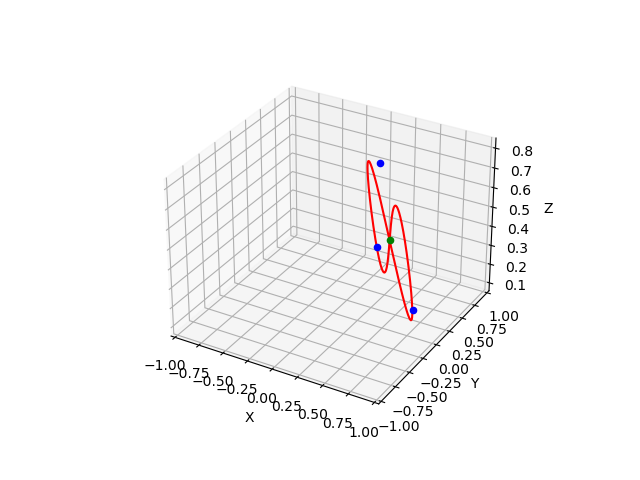

In [49]:
# graph the trajectory in 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(trajectory[:,0], trajectory[:,1], trajectory[:,2], 'r-')
ax.scatter(A[0], A[1], A[2], c='b', marker='o')
ax.scatter(B[0], B[1], B[2], c='b', marker='o')
ax.scatter(C[0], C[1], C[2], c='b', marker='o')
ax.scatter(center[0], center[1], center[2], c='g', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.show()



## Indy7 Robot

6 DOF \
Joint 1 - Base joint \
Joint 2 - Shoulder joint \
Joint 3 - Elbow joint \
Joint 4 - Wrist joint \
Joint 5 - Wrist pitch joint \
Joint 6 - Wrist roll joint

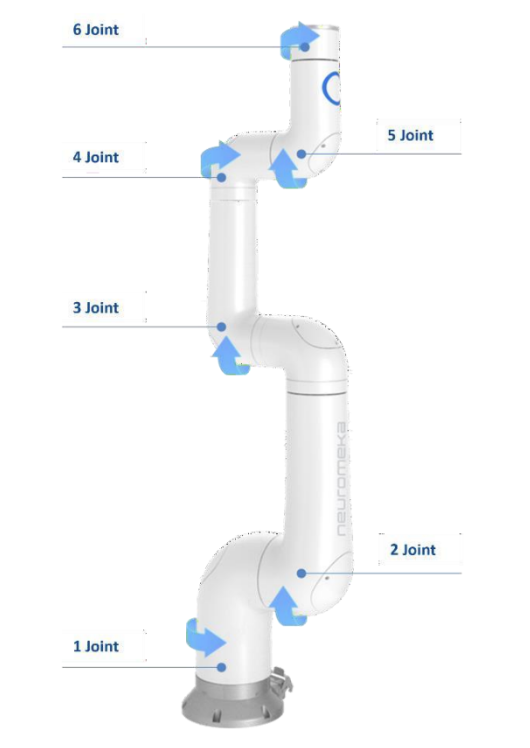

In [1]:
import ikpy.chain
import ikpy.utils.plot as plot_utils
%matplotlib widget
import matplotlib.pyplot as plt

my_chain = ikpy.chain.Chain.from_urdf_file("urdfs/indy7.urdf", base_elements=['link0'])

/home/alex/.local/lib/python3.10/site-packages/ikpy/chain.py:60: UserWarning: Link Base link (index: 0) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive
  warnings.warn("Link {} (index: {}) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive".format(link.name, link_index))


0 control:  [ 1.51468882e-10 -1.86500000e-01  1.26750000e+00]
joint 1:  [1.86500000e-01 1.51468871e-10 1.26750000e+00]
Joint 2:  [-0.968  -0.1865  0.2995]
Joint 3:  [-0.518  -0.1865  0.7495]
Joint 4:  [ 0.183  -0.0035  1.2675]
Joint 5:  [-0.168  -0.1865  1.0995]
Joint 6:  [ 1.51468882e-10 -1.86500000e-01  1.26750000e+00]


Text(0.5, 0.92, 'joint 6 (wrist roll)')

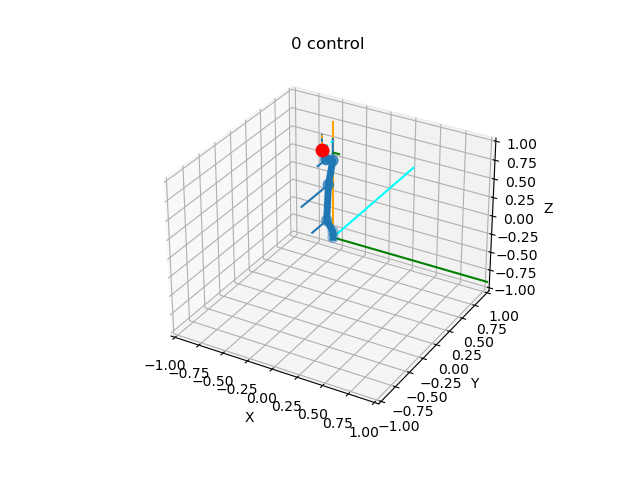

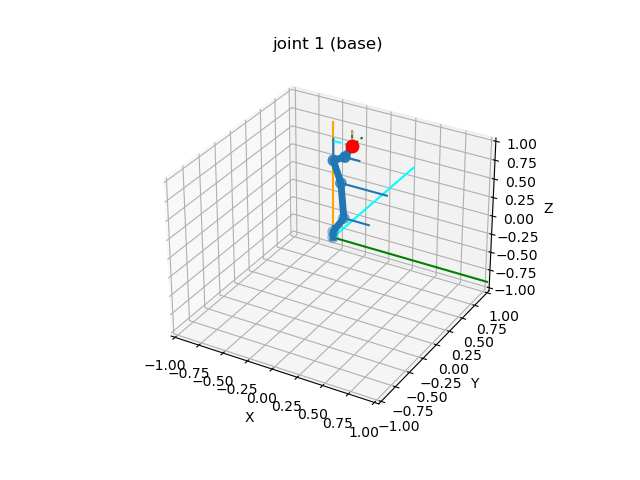

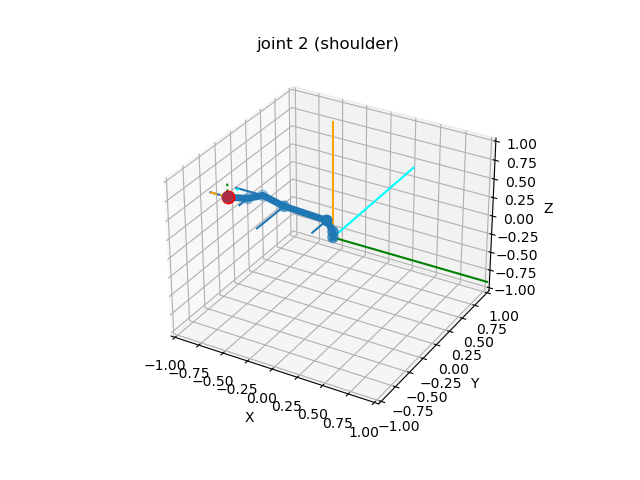

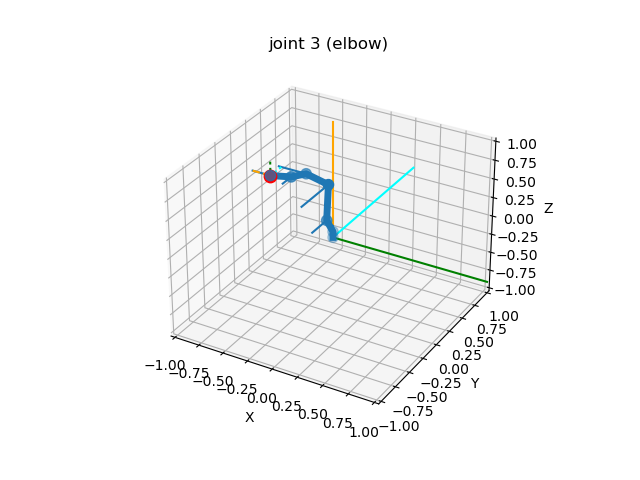

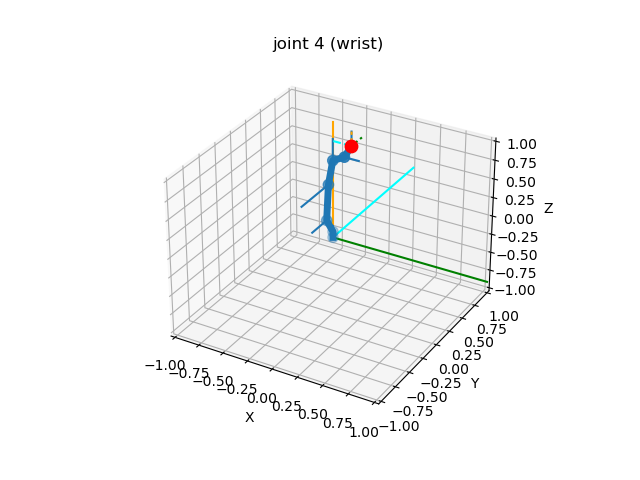

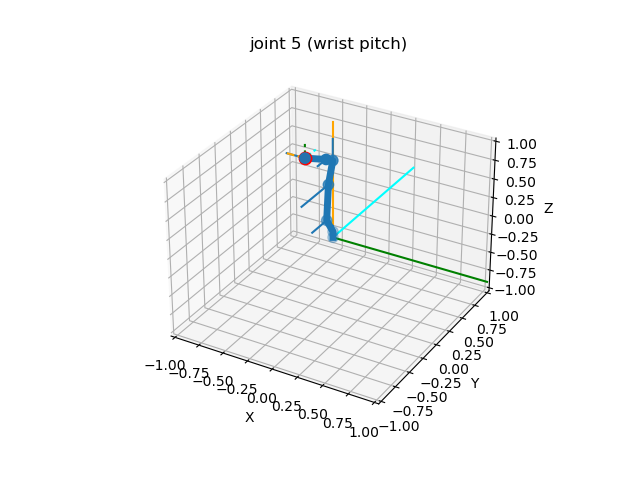

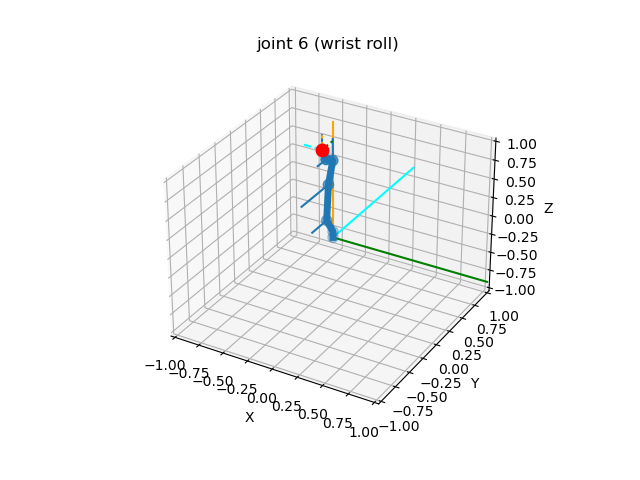

In [127]:
jpos = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
real_frame = my_chain.forward_kinematics(jpos)
print("0 control: ", real_frame[:3, 3])

fig, ax = plot_utils.init_3d_figure()
my_chain.plot(jpos, ax, target=real_frame[:3, 3])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
ax.set_title("0 control")

jpos = np.array([0.0, np.pi/2, 0.0, 0.0, 0.0, 0.0, 0.0])
real_frame = my_chain.forward_kinematics(jpos)
print("joint 1: ", real_frame[:3, 3])

fig, ax = plot_utils.init_3d_figure()
my_chain.plot(jpos, ax, target=real_frame[:3, 3])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
ax.set_title("joint 1 (base)")

jpos = np.array([0.0, 0.0, np.pi/2, 0.0, 0.0, 0.0, 0.0])
real_frame = my_chain.forward_kinematics(jpos)
print("Joint 2: ", real_frame[:3, 3])

fig, ax = plot_utils.init_3d_figure()
my_chain.plot(jpos, ax, target=real_frame[:3, 3])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
ax.set_title("joint 2 (shoulder)")

jpos = np.array([0.0, 0.0, 0.0, np.pi/2, 0.0, 0.0, 0.0])
real_frame = my_chain.forward_kinematics(jpos)
print("Joint 3: ", real_frame[:3, 3])

fig, ax = plot_utils.init_3d_figure()
my_chain.plot(jpos, ax, target=real_frame[:3, 3])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
ax.set_title("joint 3 (elbow)")

jpos = np.array([0.0, 0.0, 0.0, 0.0, np.pi/2, 0.0, 0.0])
real_frame = my_chain.forward_kinematics(jpos)
print("Joint 4: ", real_frame[:3, 3])

fig, ax = plot_utils.init_3d_figure()
my_chain.plot(jpos, ax, target=real_frame[:3, 3])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
ax.set_title("joint 4 (wrist)")

jpos = np.array([0.0, 0.0, 0.0, 0.0, 0.0, np.pi/2, 0.0])
real_frame = my_chain.forward_kinematics(jpos)
print("Joint 5: ", real_frame[:3, 3])

fig, ax = plot_utils.init_3d_figure()
my_chain.plot(jpos, ax, target=real_frame[:3, 3])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
ax.set_title("joint 5 (wrist pitch)")

jpos = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.pi/2])
real_frame = my_chain.forward_kinematics(jpos)
print("Joint 6: ", real_frame[:3, 3])

fig, ax = plot_utils.init_3d_figure()
my_chain.plot(jpos, ax, target=real_frame[:3, 3])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
ax.set_title("joint 6 (wrist roll)")

In [66]:
# compute error between 3D positions
def tracking_error(res, target):
    return np.linalg.norm(res - target)


errors = []

for i in range(len(trajectory)):
    res = my_chain.forward_kinematics(my_chain.inverse_kinematics(trajectory[i]))[:3, 3]
    error = tracking_error(res, trajectory[i])
    errors.append(error)
    print("input: ", trajectory[i], " output: ", res, " error: ", error)
    

errors = np.array(errors)

print("----------")
print("Average error: ", np.mean(errors))
print("Max error: ", np.max(errors))
print("Min error: ", np.min(errors))


input:  [0.4        0.4        0.56666667]  output:  [0.4        0.4        0.56666667]  error:  4.904288519613024e-09
input:  [0.40796439 0.38183243 0.58367196]  output:  [0.40796439 0.38183243 0.58367196]  error:  7.459339017986208e-09
input:  [0.41593324 0.36368518 0.60063597]  output:  [0.41593324 0.36368518 0.60063597]  error:  2.2298427099644248e-10
input:  [0.42391097 0.34557853 0.61751749]  output:  [0.42391097 0.34557853 0.61751749]  error:  1.391626857003949e-09
input:  [0.43190196 0.32753271 0.63427555]  output:  [0.43190196 0.32753271 0.63427555]  error:  1.6302581824840419e-09
input:  [0.43991052 0.3095678  0.65086946]  output:  [0.43991052 0.30956781 0.65086946]  error:  1.920557347084411e-09
input:  [0.44794085 0.2917038  0.66725892]  output:  [0.44794085 0.2917038  0.66725892]  error:  1.0108352575737976e-09
input:  [0.45599702 0.2739605  0.68340414]  output:  [0.45599702 0.2739605  0.68340414]  error:  1.4212405038155833e-09
input:  [0.46408297 0.25635748 0.69926592]  

In [71]:
#save figure 8 trajectory to csv file
np.savetxt("trajectories/figure8_traj_eePos_meters.csv", trajectory, delimiter=",")

In [2]:
#get jpos for trajectory, using last jpos as initial guess
jpos = []
last_guess = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
for i in range(len(trajectory)):
    jpos.append(my_chain.inverse_kinematics(trajectory[i], initial_position=last_guess))
    last_guess = jpos[-1]
    
jpos = np.array(jpos)

np.savetxt("trajectories/figure8_traj_jpos_rad.csv", jpos, delimiter=",")

NameError: name 'np' is not defined

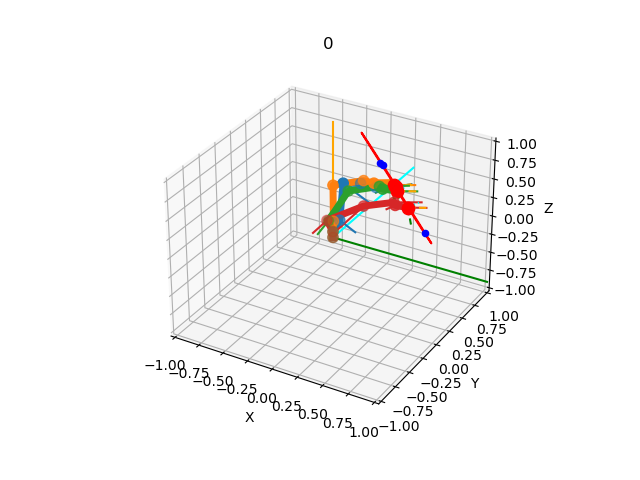

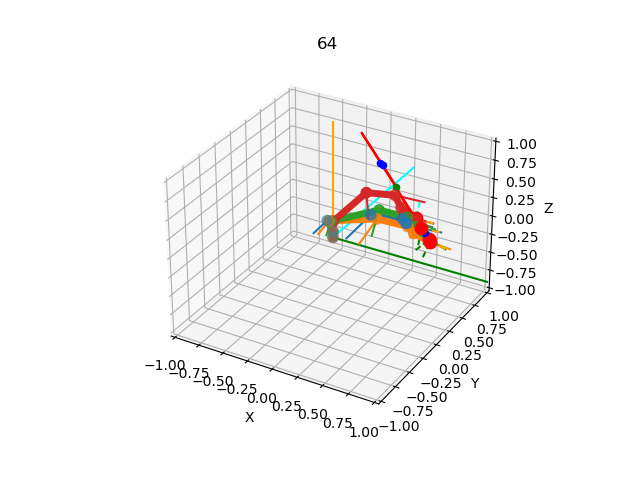

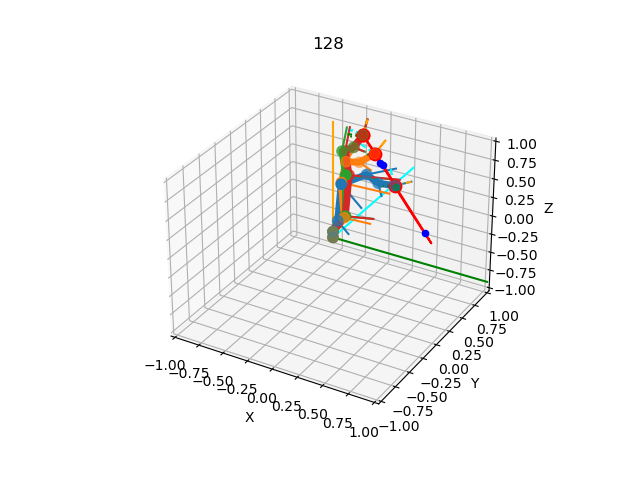

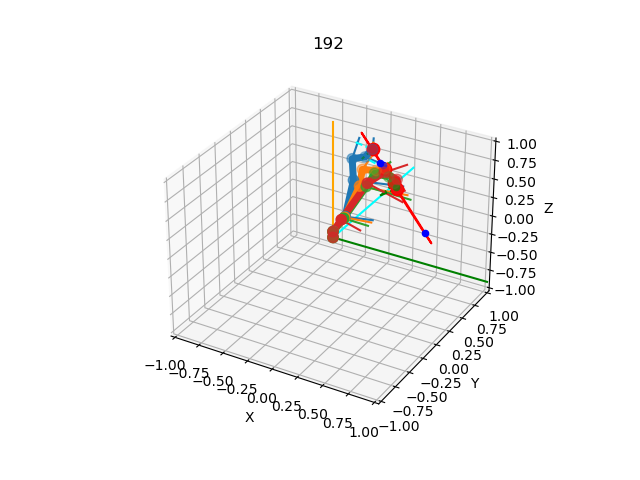

In [68]:
# plot robot at certain points in trajectory
for i in range(0, len(trajectory), 64):
    fig, ax = plot_utils.init_3d_figure()
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    ax.set_title(i)
    
    for j in range(0, 4):
        real_frame = my_chain.forward_kinematics(jpos[i + j * 16])
        my_chain.plot(jpos[i + j * 16], ax, target=real_frame[:3, 3])
        
    ax.plot(trajectory[:,0], trajectory[:,1], trajectory[:,2], 'r-')
    # ax.scatter(A[0], A[1], A[2], c='b', marker='o')
    # ax.scatter(B[0], B[1], B[2], c='b', marker='o')
    # ax.scatter(C[0], C[1], C[2], c='b', marker='o')
    ax.scatter(center[0], center[1], center[2], c='g', marker='o')    
        
    